
Summary Statistics:
        Days with AQI  Unhealthy for Sensitive Groups Days  Unhealthy Days  \
mean       124.116649                             0.544008        0.062566   
median     121.000000                             0.000000        0.000000   
std         51.275029                             1.950536        0.522639   

        Very Unhealthy Days  Median AQI  Days Ozone  Days PM2.5  
mean               0.007423   37.574761   61.089077   57.063627  
median             0.000000   39.000000   50.000000   56.000000  
std                0.097463    9.637290   56.856923   49.787470  


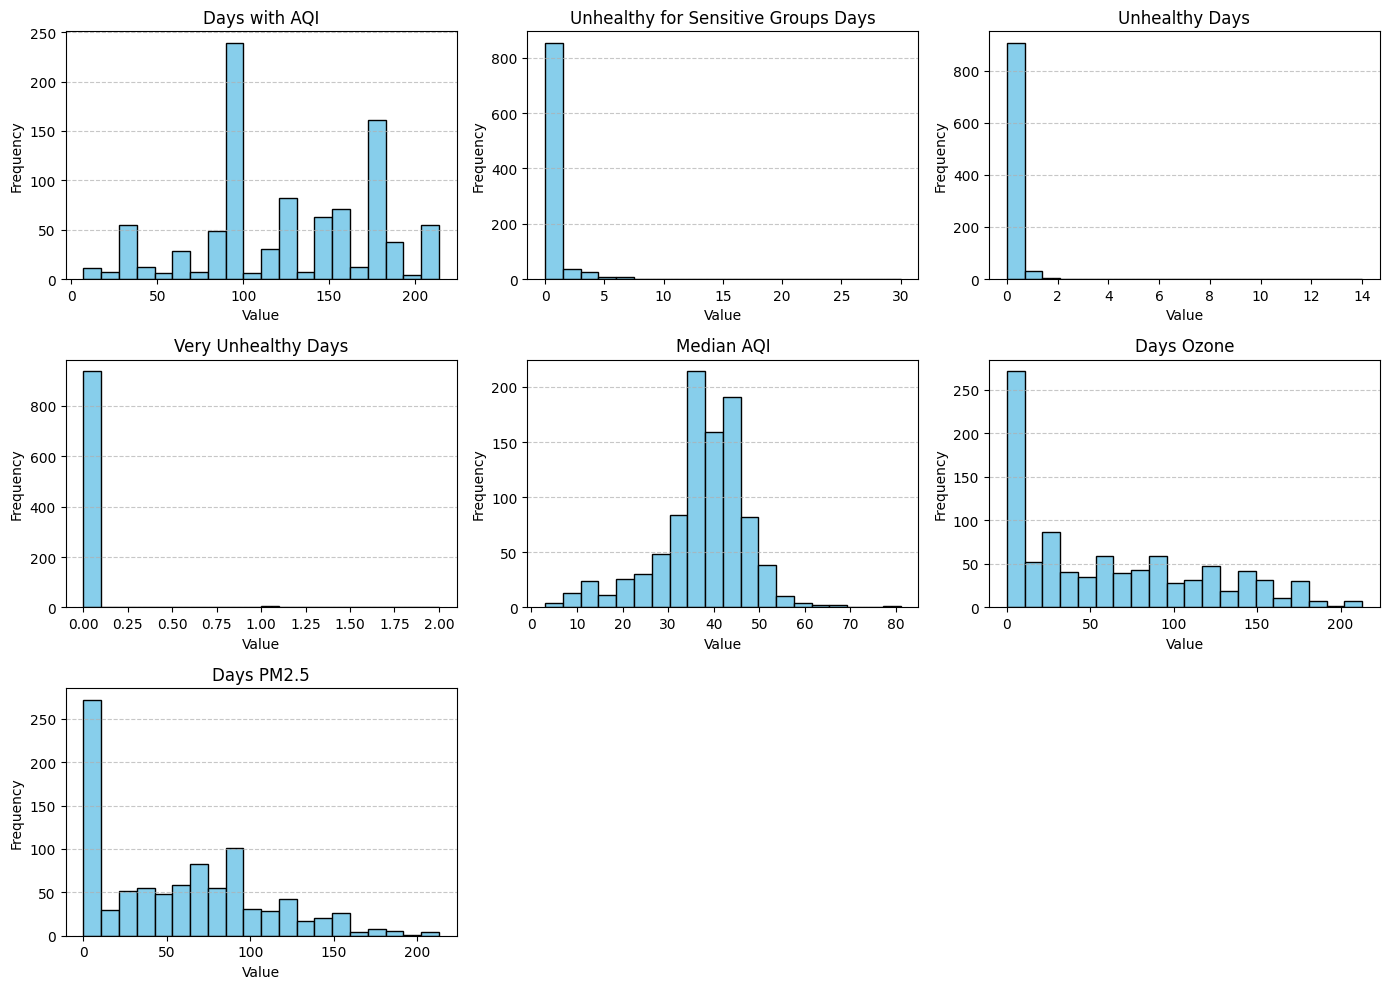

In [1]:
# Import  libraries
import pandas as pd
import matplotlib.pyplot as plt

aqi_data = pd.read_csv("annual_aqi_by_county_2024.csv")

#  variables 

Rvars = [
    "Days with AQI",
    "Unhealthy for Sensitive Groups Days",
    "Unhealthy Days",
    "Very Unhealthy Days",
    "Median AQI",
    "Days Ozone",
    "Days PM2.5",
]


# Calculate summary statistics for variables
summary_stats = aqi_data[Rvars].agg(["mean", "median", "std"])
print("\nSummary Statistics:")
print(summary_stats)

# Generate histograms 
plt.figure(figsize=(14, 10))
for i, var in enumerate(Rvars, 1):
    plt.subplot(3, 3, i)
    plt.hist(aqi_data[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(var)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# layout/plots
plt.tight_layout()  # I looked this up, makes it way neater on the output, as they tend to overlap.
plt.show()




Linear Regression between 'Median AQI' and 'Days Ozone':
  Slope: 2.0788
  Intercept: -17.0207
  R-squared: 0.1242
  p-value: 5.9850e-29


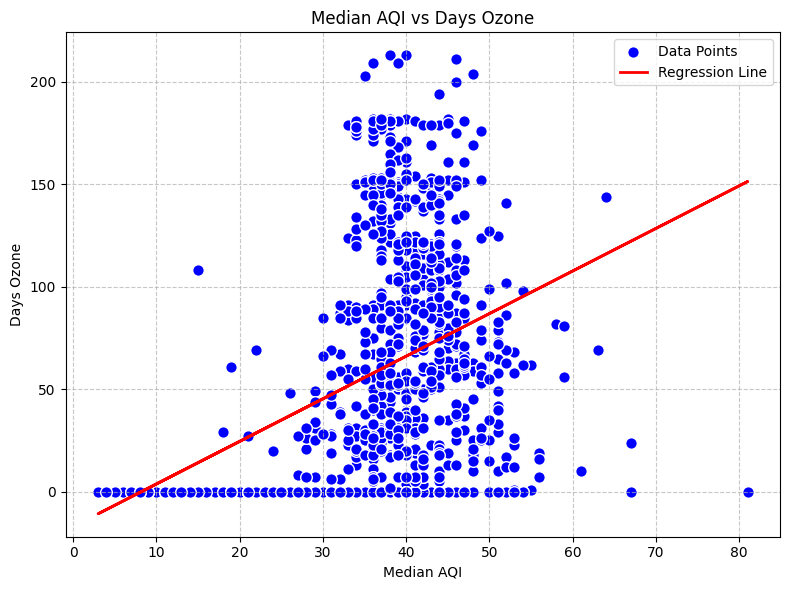


Linear Regression between 'Median AQI' and 'Days PM2.5':
  Slope: -0.0871
  Intercept: 60.3360
  R-squared: 0.0003
  p-value: 6.0514e-01


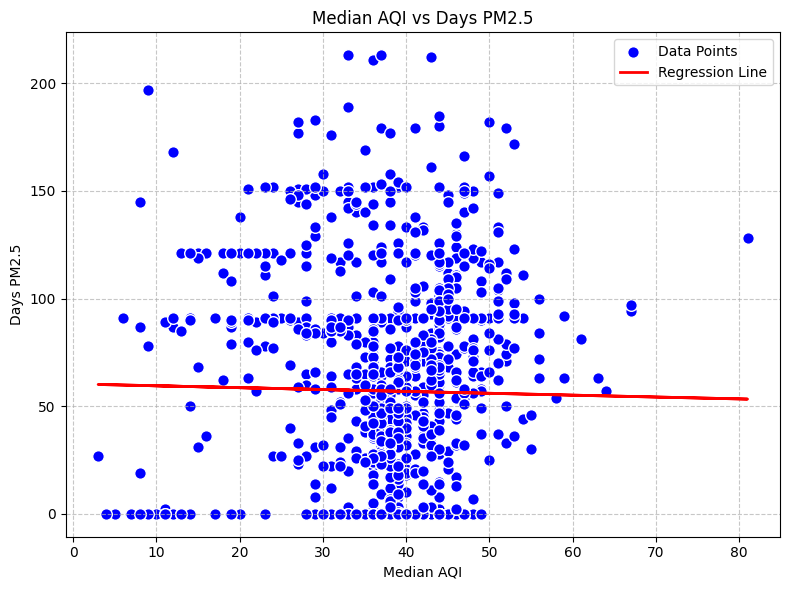


Linear Regression between 'Unhealthy for Sensitive Groups Days' and 'Days PM2.5':
  Slope: 0.9460
  Intercept: 56.5490
  R-squared: 0.0014
  p-value: 2.5555e-01


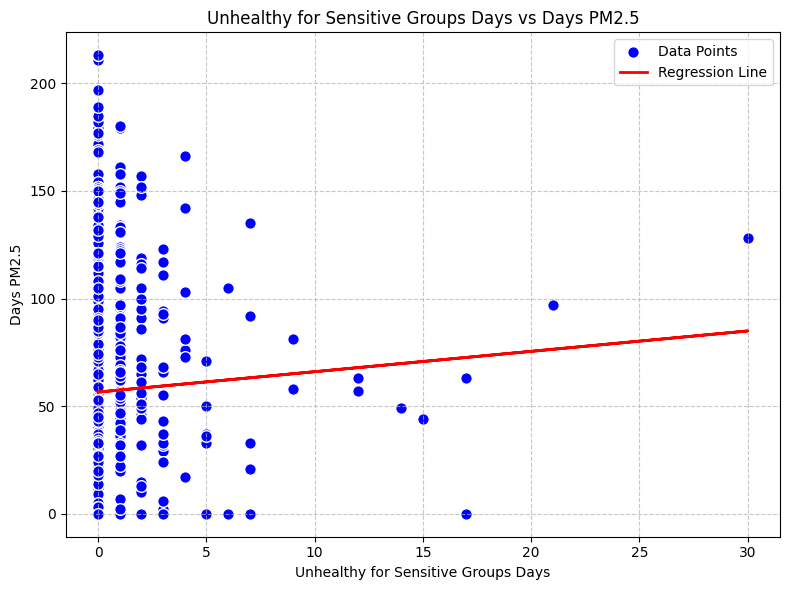


Linear Regression between 'Unhealthy for Sensitive Groups Days' and 'Days Ozone':
  Slope: 4.1310
  Intercept: 58.8418
  R-squared: 0.0201
  p-value: 1.2524e-05


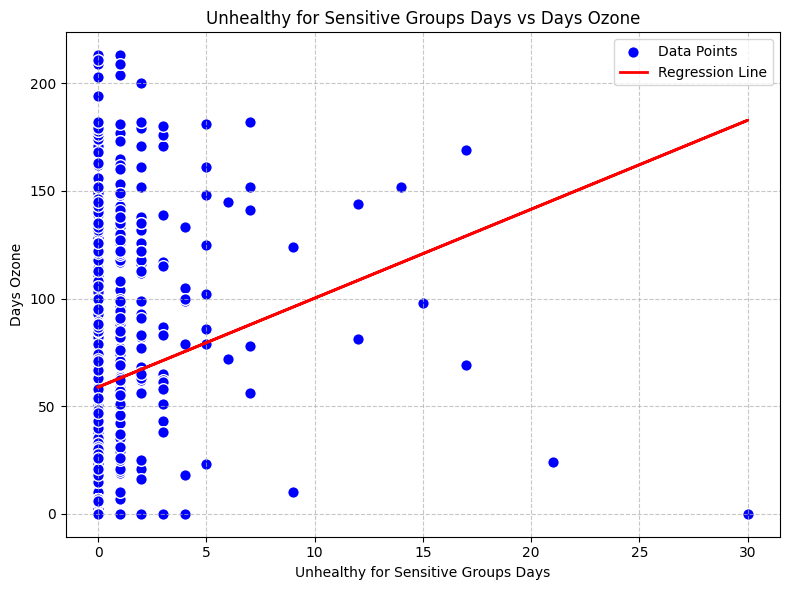


Linear Regression between 'Days with AQI' and 'Days Ozone':
  Slope: 0.6119
  Intercept: -14.8571
  R-squared: 0.3045
  p-value: 2.9584e-76


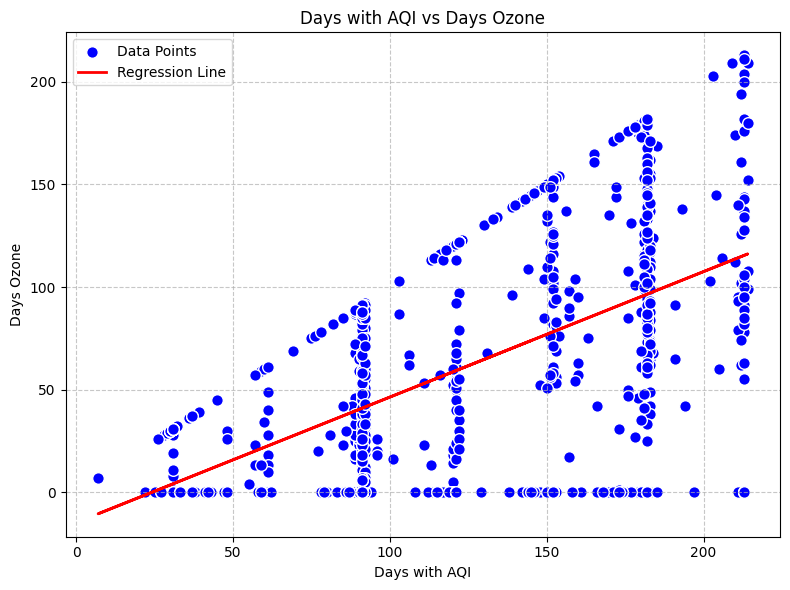


Linear Regression between 'Days with AQI' and 'Days PM2.5':
  Slope: 0.3512
  Intercept: 13.4757
  R-squared: 0.1308
  p-value: 1.6107e-30


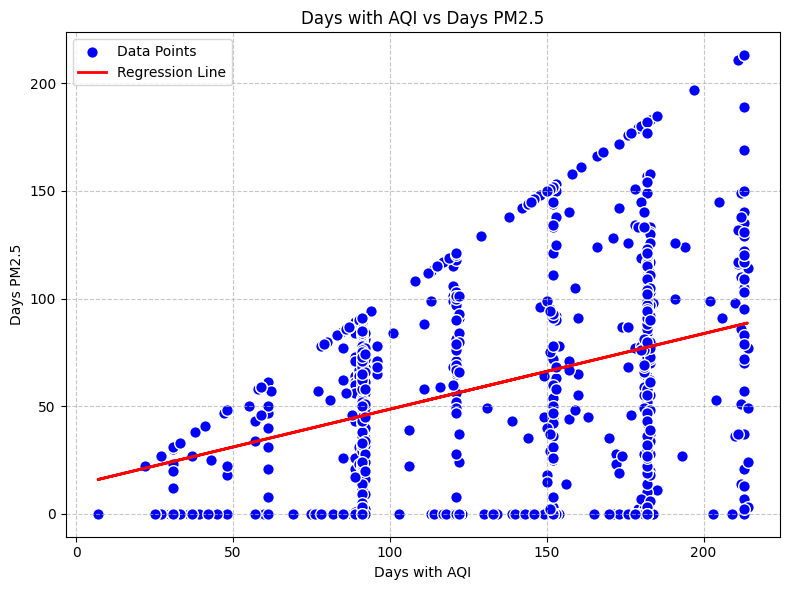


Correlation Coefficients:
                                       Variable Pair  Pearson Correlation  \
0                           Median AQI vs Days Ozone             0.352355   
1                           Median AQI vs Days PM2.5            -0.016858   
2  Unhealthy for Sensitive Groups Days vs Days PM2.5             0.037061   
3  Unhealthy for Sensitive Groups Days vs Days Ozone             0.141719   
4                        Days with AQI vs Days Ozone             0.551821   
5                        Days with AQI vs Days PM2.5             0.361678   

   Pearson p-value  Spearman Correlation  Spearman p-value  
0     5.984989e-29              0.393509      2.755491e-36  
1     6.051400e-01              0.023945      4.626839e-01  
2     2.555503e-01              0.072858      2.526396e-02  
3     1.252439e-05              0.260812      3.960587e-16  
4     2.958369e-76              0.502696      1.552263e-61  
5     1.610730e-30              0.327733      4.761296e-25  


In [2]:
# repitiion 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, linregress



# Define the vars
variable_pairs = [
    ("Median AQI", "Days Ozone"),
    ("Median AQI", "Days PM2.5"),
    ("Unhealthy for Sensitive Groups Days", "Days PM2.5"),
    ("Unhealthy for Sensitive Groups Days", "Days Ozone"),
    ("Days with AQI", "Days Ozone"),
    ("Days with AQI", "Days PM2.5")
]

# DataFrame for correlation results
correlation_results = pd.DataFrame(columns=[
    'Variable Pair',
    'Pearson Correlation',
    'Pearson p-value',
    'Spearman Correlation',
    'Spearman p-value'
])


# Initialize a list to store correlation results
correlation_results = []

# Iterate through each pair to calculate correlations and perform regression
for pair in variable_pairs:
    var_x, var_y = pair
    data_x = aqi_data[var_x]
    data_y = aqi_data[var_y]
    
    # Calculate Pearson Correlation
    pearson_corr, pearson_p = pearsonr(data_x, data_y)
    
    # Calculate Spearman Correlation
    spearman_corr, spearman_p = spearmanr(data_x, data_y)
    
    # Append the results as a dictionary to the list
    correlation_results.append({
        'Variable Pair': f"{var_x} vs {var_y}",
        'Pearson Correlation': pearson_corr,
        'Pearson p-value': pearson_p,
        'Spearman Correlation': spearman_corr,
        'Spearman p-value': spearman_p
    })
    
    #  Linear Regression
    slope, intercept, r_value, p_value, std_err = linregress(data_x, data_y)
    
    # Print Regression Results
    print(f"\nLinear Regression between '{var_x}' and '{var_y}':")
    print(f"  Slope: {slope:.4f}")
    print(f"  Intercept: {intercept:.4f}")
    print(f"  R-squared: {r_value**2:.4f}")
    print(f"  p-value: {p_value:.4e}")
    
    
    # Scatter Plot w/ Regression Line
    plt.figure(figsize=(8, 6))
    plt.scatter(data_x, data_y, color='blue', edgecolor='w', s=70, label="Data Points")
    
    # Calculate regression 
    regression_line = slope * data_x + intercept
    plt.plot(data_x, regression_line, color='red', linewidth=2, label="Regression Line")
    plt.title(f"{var_x} vs {var_y}")
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

#  list of dictionaries to a DataFrame
correlation_results_df = pd.DataFrame(correlation_results)

# print
print("\nCorrelation Coefficients:")
print(correlation_results_df)


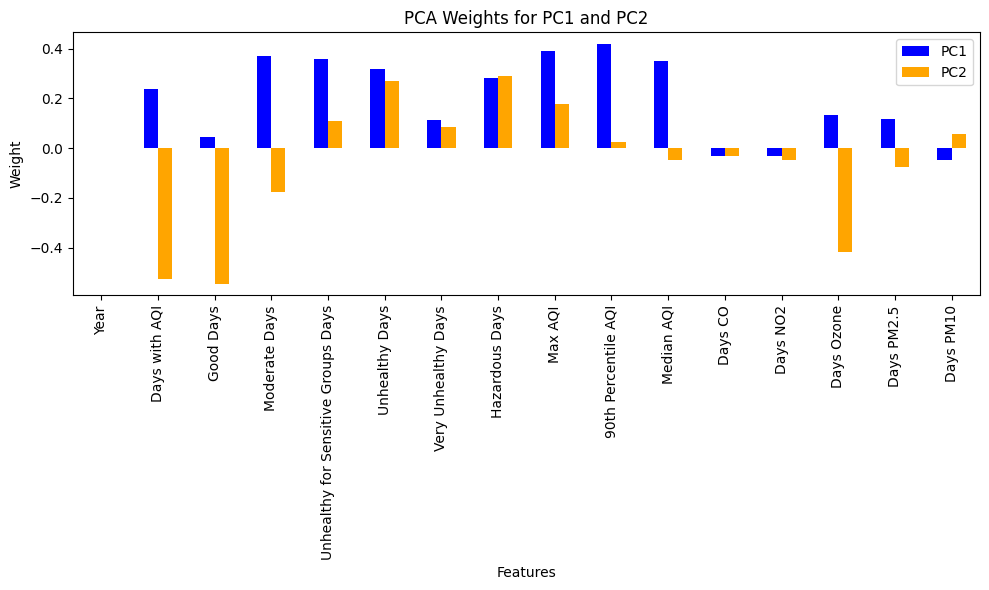

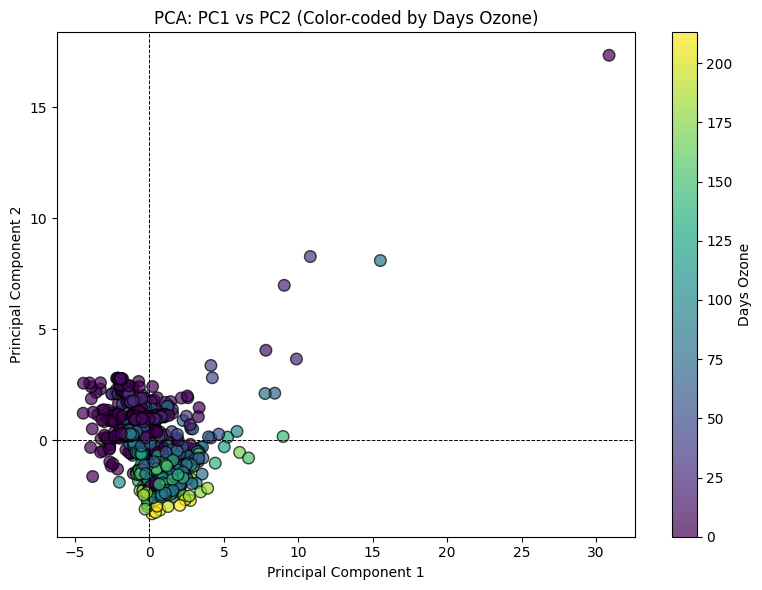

Variance Ratio:
PC1: 0.2733
PC2: 0.1622
PC3: 0.1196
PC4: 0.1070
PC5: 0.0676
PC6: 0.0645
PC7: 0.0639
PC8: 0.0578
PC9: 0.0398
PC10: 0.0183
PC11: 0.0113
PC12: 0.0082
PC13: 0.0064
PC14: 0.0000
PC15: 0.0000
PC16: 0.0000


In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select # columns
quantitative_columns = aqi_data.select_dtypes(include=['float64', 'int64']).columns

# Standardize forgot to do last quiz 
scaler = StandardScaler()
standardized_data = scaler.fit_transform(aqi_data[quantitative_columns].dropna())

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(standardized_data)
explained_variance = pca.explained_variance_ratio_

#  DataFrame for component weights PC
component_weights = pd.DataFrame(
    pca.components_.T, 
    index=quantitative_columns, 
    columns=[f'PC{i+1}' for i in range(len(quantitative_columns))]
)

# Plot PCA weights for PC1 / PC2
component_weights[['PC1', 'PC2']].plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title("PCA Weights for PC1 and PC2")
plt.xlabel("Features")
plt.ylabel("Weight")
plt.legend(["PC1", "PC2"])
plt.tight_layout()
plt.show()

# Scatter plot: PC1 vs PC2
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    principal_components[:, 0], principal_components[:, 1],
    c=aqi_data['Days Ozone'].dropna(), cmap='viridis', edgecolors='k', s=70, alpha=0.7
)
plt.colorbar(scatter, label='Days Ozone')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.axvline(0, color='black', linestyle='--', linewidth=0.7)
plt.title("PCA: PC1 vs PC2 (Color-coded by Days Ozone)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()

# Print variance
print("Variance Ratio:")
pc_number = 1
for variance in explained_variance:
    print(f"PC{pc_number}: {variance:.4f}")
    pc_number += 1


